In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.naive_bayes import GaussianNB #Algoritmo simples para fazer estimativas de probabilidade
from sklearn.pipeline import Pipeline

In [2]:
base = datasets.load_digits() #Base de digitos numéricos à mão
previsores = np.asarray(base.data,"float32")
classe = base.target

In [3]:
normalizador = MinMaxScaler(feature_range=(0,1))
previsores = normalizador.fit_transform(previsores)

In [4]:
previsores_treinamento,previsores_teste,classe_treinamento,classe_teste = train_test_split(previsores,classe,test_size=0.2,random_state=0)

In [ ]:
rbm = BernoulliRBM(random_state=0)
rbm.n_iter = 25 #numero de época
rbm.n_components = 50 #número de neurônios na camada oculta
naive_rbm = GaussianNB()
classificador_rbm = Pipeline(steps= [('rbm',rbm),('naive',naive_rbm)]) #Executar os dois processos
classificador_rbm.fit(previsores_treinamento,classe_treinamento)

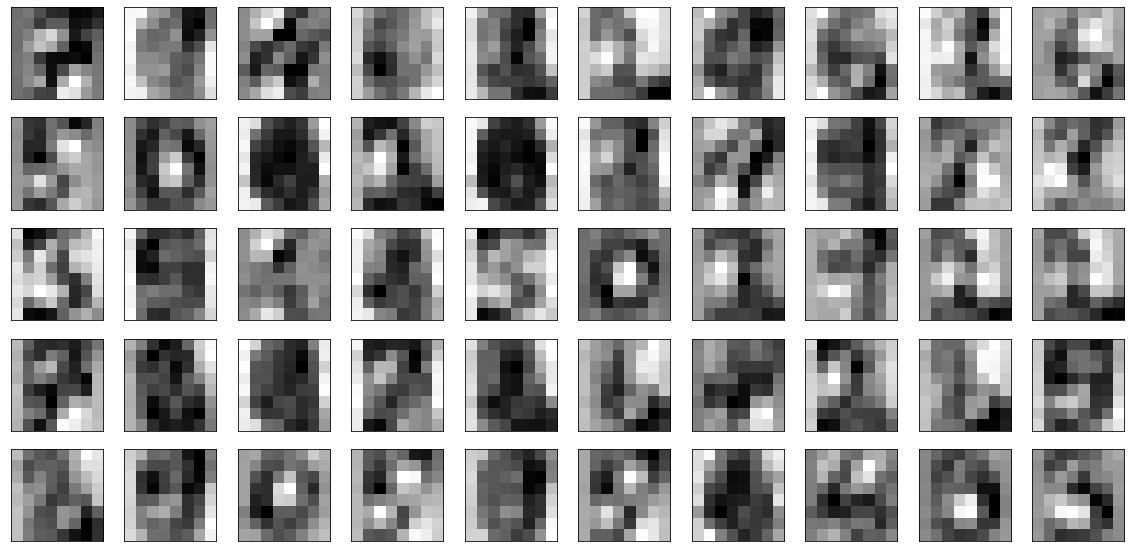

In [9]:
plt.figure(figsize=(20,20))
for i,comp in enumerate(rbm.components_):
    plt.subplot(10,10,i+1)
    plt.imshow(comp.reshape((8,8)), cmap=plt.cm.gray_r)
    plt.xticks(())
    plt.yticks(())
plt.show()

In [10]:
previsores_rbm = classificador_rbm.predict(previsores_teste)

In [12]:
precisao_rbm = metrics.accuracy_score(previsores_rbm,classe_teste)
precisao_rbm

0.8861111111111111

In [14]:
naive_simples = GaussianNB()
naive_simples.fit(previsores_treinamento,classe_treinamento)
previsoes_naive = naive_simples.predict(previsores_teste)
precisao_naive = metrics.accuracy_score(previsoes_naive,classe_teste)
precisao_naive

0.8111111111111111